In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.preprocessing import StandardScaler
import os
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [2]:
df1=pd.read_csv("database.csv")

In [3]:
Y = df1.iloc[:,25:28]
X = df1.iloc[:,:8]
Y.head()

,q_abs,q_sca,g
0,0.11691,0.000389,0.003798
1,0.15300,0.001005,0.008979
2,0.20060,0.002514,0.022970
3,0.23162,0.004187,0.037044
4,0.25746,0.005988,0.051049


In [4]:
train_set=df1[(df1['wavelength']==467) | (df1['wavelength']==660)]
test_set=df1[df1['wavelength']==530]
train_set.shape

(6446, 36)

In [5]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [6]:
scaling_x=StandardScaler()
#scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
#Y_train=scaling_y.fit_transform(Y_train)

Hyperparameters:
1. No of hideen layers
2. No of neurons in hidden layers
3. Learning rate

In [8]:
def build_model(hp):
    model=keras.Sequential()
    
    for i in range(hp.Int('num_layers', 3,10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=256,
                                           step=32),
                               kernel_initializer='normal',
                              activation='relu'))
        model.add(layers.Dense(3, activation='linear'))
        model.compile(optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_percentage_error',
        metrics=['mean_absolute_percentage_error'])
        
    return model
        
    
    

In [9]:
tuner=RandomSearch(build_model,
                  objective='mean_absolute_percentage_error',
                  max_trials=8,
                  executions_per_trial=2,
                   directory= 'project1',
                   project_name='wavelength_530'
                  )

In [10]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}


In [11]:
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

In [12]:
tuner.search(X_train, Y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=[es])

Trial 8 Complete [00h 01m 42s]
mean_absolute_percentage_error: 17.920591354370117

Best mean_absolute_percentage_error So Far: 2.7289795875549316
Total elapsed time: 00h 11m 32s
INFO:tensorflow:Oracle triggered exit


In [13]:
tuner.results_summary()

Results summary
Results in project1\wavelength_530
Showing 10 best trials
Objective(name='mean_absolute_percentage_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 160
learning_rate: 0.001
units_1: 32
units_2: 160
units_3: 128
units_4: 224
units_5: 192
units_6: 256
units_7: 128
units_8: 256
Score: 2.7289795875549316
Trial summary
Hyperparameters:
num_layers: 3
units_0: 96
learning_rate: 0.01
units_1: 192
units_2: 128
units_3: 192
units_4: 192
units_5: 256
units_6: 256
units_7: 96
units_8: 32
Score: 8.99292802810669
Trial summary
Hyperparameters:
num_layers: 4
units_0: 224
learning_rate: 0.01
units_1: 160
units_2: 128
units_3: 224
units_4: 96
units_5: 224
units_6: 256
units_7: 128
units_8: 64
units_9: 96
Score: 13.859906196594238
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
learning_rate: 0.0001
units_1: 96
units_2: 128
units_3: 128
units_4: 224
units_5: 96
units_6: 96
units_7: 64
units_8: 64
units_9: 224
Score: 17.920591354370117
Trial summary

In [7]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(160, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(160, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(224, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(192, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(96, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='linear'))


# Compile the network :
NN_model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               1440      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                5152      
_________________________________________________________________
dense_2 (Dense)              (None, 160)               5280      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               20608     
_________________________________________________________________
dense_4 (Dense)              (None, 224)               28896     
_________________________________________________________________
dense_5 (Dense)              (None, 192)               43200     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4

In [8]:
filepath="wavelength_530/Weights-{epoch:03d}--{val_loss:.5f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

In [9]:
# # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

In [10]:
log_csv=CSVLogger('wavelength_530_loss_logs.csv', separator=',', append=False)

In [11]:
callback_list=[checkpoint, es, log_csv]

In [12]:
history= NN_model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callback_list)
#history= NN_model.fit(X_train, Y_train, epochs=7, batch_size=32, validation_split = 0.2)

Epoch 1/500
145/162 [=========================>....] - ETA: 0s - loss: 54.3549 - mean_absolute_percentage_error: 54.3549
Epoch 00001: val_loss improved from inf to 30.83473, saving model to wavelength_530\Weights-001--30.83473.hdf5
162/162 [==============================] - 1s 4ms/step - loss: 51.6469 - mean_absolute_percentage_error: 51.6469 - val_loss: 30.8347 - val_mean_absolute_percentage_error: 30.8347
Epoch 2/500
138/162 [========================>.....] - ETA: 0s - loss: 27.0725 - mean_absolute_percentage_error: 27.0725
Epoch 00002: val_loss improved from 30.83473 to 28.83150, saving model to wavelength_530\Weights-002--28.83150.hdf5
162/162 [==============================] - 0s 3ms/step - loss: 26.8403 - mean_absolute_percentage_error: 26.8403 - val_loss: 28.8315 - val_mean_absolute_percentage_error: 28.8315
Epoch 3/500
156/162 [===========================>..] - ETA: 0s - loss: 23.8704 - mean_absolute_percentage_error: 23.8704
Epoch 00003: val_loss improved from 28.83150 to 27.9

Epoch 23/500
156/162 [===========================>..] - ETA: 0s - loss: 6.0328 - mean_absolute_percentage_error: 6.0328
Epoch 00023: val_loss did not improve from 8.77568
162/162 [==============================] - 0s 2ms/step - loss: 6.0429 - mean_absolute_percentage_error: 6.0429 - val_loss: 12.1503 - val_mean_absolute_percentage_error: 12.1503
Epoch 24/500
150/162 [==========================>...] - ETA: 0s - loss: 5.0453 - mean_absolute_percentage_error: 5.0453
Epoch 00024: val_loss improved from 8.77568 to 7.89610, saving model to wavelength_530\Weights-024--7.89610.hdf5
162/162 [==============================] - 0s 3ms/step - loss: 5.1359 - mean_absolute_percentage_error: 5.1359 - val_loss: 7.8961 - val_mean_absolute_percentage_error: 7.8961
Epoch 25/500
137/162 [========================>.....] - ETA: 0s - loss: 5.0551 - mean_absolute_percentage_error: 5.0551
Epoch 00025: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 2ms/step - loss: 4.9677 - m

Epoch 47/500
147/162 [==========================>...] - ETA: 0s - loss: 5.4356 - mean_absolute_percentage_error: 5.4356
Epoch 00047: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 2ms/step - loss: 5.3110 - mean_absolute_percentage_error: 5.3110 - val_loss: 11.4515 - val_mean_absolute_percentage_error: 11.4515
Epoch 48/500
159/162 [============================>.] - ETA: 0s - loss: 4.3427 - mean_absolute_percentage_error: 4.3427
Epoch 00048: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 2ms/step - loss: 4.3309 - mean_absolute_percentage_error: 4.3309 - val_loss: 10.8924 - val_mean_absolute_percentage_error: 10.8924
Epoch 49/500
146/162 [==========================>...] - ETA: 0s - loss: 4.3873 - mean_absolute_percentage_error: 4.3873
Epoch 00049: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 2ms/step - loss: 4.4174 - mean_absolute_percentage_error: 4.4174 - val_loss: 9.3673 - v

Epoch 71/500
155/162 [===========================>..] - ETA: 0s - loss: 3.8701 - mean_absolute_percentage_error: 3.8701
Epoch 00071: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 2ms/step - loss: 3.8670 - mean_absolute_percentage_error: 3.8670 - val_loss: 11.8155 - val_mean_absolute_percentage_error: 11.8155
Epoch 72/500
158/162 [============================>.] - ETA: 0s - loss: 3.9959 - mean_absolute_percentage_error: 3.9959
Epoch 00072: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 3ms/step - loss: 3.9891 - mean_absolute_percentage_error: 3.9891 - val_loss: 9.4927 - val_mean_absolute_percentage_error: 9.4927
Epoch 73/500
144/162 [=========================>....] - ETA: 0s - loss: 4.0160 - mean_absolute_percentage_error: 4.0160
Epoch 00073: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 3ms/step - loss: 3.9178 - mean_absolute_percentage_error: 3.9178 - val_loss: 8.3407 - val

Epoch 95/500
139/162 [========================>.....] - ETA: 0s - loss: 3.7821 - mean_absolute_percentage_error: 3.7821
Epoch 00095: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 2ms/step - loss: 3.7212 - mean_absolute_percentage_error: 3.7212 - val_loss: 9.6834 - val_mean_absolute_percentage_error: 9.6834
Epoch 96/500
142/162 [=========================>....] - ETA: 0s - loss: 4.5447 - mean_absolute_percentage_error: 4.5447
Epoch 00096: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 2ms/step - loss: 4.5327 - mean_absolute_percentage_error: 4.5327 - val_loss: 9.2914 - val_mean_absolute_percentage_error: 9.2914
Epoch 97/500
149/162 [==========================>...] - ETA: 0s - loss: 3.7809 - mean_absolute_percentage_error: 3.7809
Epoch 00097: val_loss did not improve from 7.89610
162/162 [==============================] - 0s 2ms/step - loss: 3.7602 - mean_absolute_percentage_error: 3.7602 - val_loss: 9.6776 - val_m

162/162 [==============================] - ETA: 0s - loss: 3.9825 - mean_absolute_percentage_error: 3.9825
Epoch 00118: val_loss did not improve from 7.72818
162/162 [==============================] - 0s 3ms/step - loss: 3.9825 - mean_absolute_percentage_error: 3.9825 - val_loss: 9.0548 - val_mean_absolute_percentage_error: 9.0548
Epoch 119/500
155/162 [===========================>..] - ETA: 0s - loss: 4.2248 - mean_absolute_percentage_error: 4.2248
Epoch 00119: val_loss did not improve from 7.72818
162/162 [==============================] - 1s 3ms/step - loss: 4.2588 - mean_absolute_percentage_error: 4.2588 - val_loss: 10.4877 - val_mean_absolute_percentage_error: 10.4877
Epoch 120/500
143/162 [=========================>....] - ETA: 0s - loss: 4.0305 - mean_absolute_percentage_error: 4.0305
Epoch 00120: val_loss did not improve from 7.72818
162/162 [==============================] - 0s 2ms/step - loss: 3.9931 - mean_absolute_percentage_error: 3.9931 - val_loss: 8.9613 - val_mean_absol

139/162 [========================>.....] - ETA: 0s - loss: 3.4375 - mean_absolute_percentage_error: 3.4375
Epoch 00141: val_loss did not improve from 6.97799
162/162 [==============================] - 0s 2ms/step - loss: 3.4054 - mean_absolute_percentage_error: 3.4054 - val_loss: 12.6075 - val_mean_absolute_percentage_error: 12.6075
Epoch 142/500
146/162 [==========================>...] - ETA: 0s - loss: 3.3280 - mean_absolute_percentage_error: 3.3280
Epoch 00142: val_loss did not improve from 6.97799
162/162 [==============================] - 0s 2ms/step - loss: 3.3775 - mean_absolute_percentage_error: 3.3775 - val_loss: 9.2818 - val_mean_absolute_percentage_error: 9.2818
Epoch 143/500
143/162 [=========================>....] - ETA: 0s - loss: 3.3228 - mean_absolute_percentage_error: 3.3228
Epoch 00143: val_loss did not improve from 6.97799
162/162 [==============================] - 0s 2ms/step - loss: 3.3342 - mean_absolute_percentage_error: 3.3342 - val_loss: 10.7383 - val_mean_abso

Epoch 165/500
140/162 [========================>.....] - ETA: 0s - loss: 3.2693 - mean_absolute_percentage_error: 3.2693
Epoch 00165: val_loss did not improve from 6.97799
162/162 [==============================] - 0s 2ms/step - loss: 3.2923 - mean_absolute_percentage_error: 3.2923 - val_loss: 9.7197 - val_mean_absolute_percentage_error: 9.7197
Epoch 166/500
160/162 [============================>.] - ETA: 0s - loss: 3.3065 - mean_absolute_percentage_error: 3.3065
Epoch 00166: val_loss did not improve from 6.97799
162/162 [==============================] - 0s 3ms/step - loss: 3.3036 - mean_absolute_percentage_error: 3.3036 - val_loss: 8.4257 - val_mean_absolute_percentage_error: 8.4257
Epoch 167/500
160/162 [============================>.] - ETA: 0s - loss: 3.3915 - mean_absolute_percentage_error: 3.3915
Epoch 00167: val_loss improved from 6.97799 to 6.92471, saving model to wavelength_530\Weights-167--6.92471.hdf5
162/162 [==============================] - 0s 3ms/step - loss: 3.3902 - 

144/162 [=========================>....] - ETA: 0s - loss: 3.1489 - mean_absolute_percentage_error: 3.1489
Epoch 00188: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.1503 - mean_absolute_percentage_error: 3.1503 - val_loss: 9.6224 - val_mean_absolute_percentage_error: 9.6224
Epoch 189/500
146/162 [==========================>...] - ETA: 0s - loss: 3.2477 - mean_absolute_percentage_error: 3.2477
Epoch 00189: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.2647 - mean_absolute_percentage_error: 3.2647 - val_loss: 9.8878 - val_mean_absolute_percentage_error: 9.8878
Epoch 190/500
150/162 [==========================>...] - ETA: 0s - loss: 3.4794 - mean_absolute_percentage_error: 3.4794
Epoch 00190: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.4234 - mean_absolute_percentage_error: 3.4234 - val_loss: 10.7854 - val_mean_absolu

Epoch 212/500
148/162 [==========================>...] - ETA: 0s - loss: 3.0682 - mean_absolute_percentage_error: 3.0682
Epoch 00212: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.0471 - mean_absolute_percentage_error: 3.0471 - val_loss: 7.9586 - val_mean_absolute_percentage_error: 7.9586
Epoch 213/500
149/162 [==========================>...] - ETA: 0s - loss: 3.2208 - mean_absolute_percentage_error: 3.2208
Epoch 00213: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.1738 - mean_absolute_percentage_error: 3.1738 - val_loss: 8.1983 - val_mean_absolute_percentage_error: 8.1983
Epoch 214/500
146/162 [==========================>...] - ETA: 0s - loss: 3.0383 - mean_absolute_percentage_error: 3.0383
Epoch 00214: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.0099 - mean_absolute_percentage_error: 3.0099 - val_loss: 8.1859 - va

Epoch 236/500
148/162 [==========================>...] - ETA: 0s - loss: 3.0064 - mean_absolute_percentage_error: 3.0064
Epoch 00236: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.0192 - mean_absolute_percentage_error: 3.0192 - val_loss: 7.8322 - val_mean_absolute_percentage_error: 7.8322
Epoch 237/500
141/162 [=========================>....] - ETA: 0s - loss: 3.1499 - mean_absolute_percentage_error: 3.1499
Epoch 00237: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.1114 - mean_absolute_percentage_error: 3.1114 - val_loss: 7.2333 - val_mean_absolute_percentage_error: 7.2333
Epoch 238/500
149/162 [==========================>...] - ETA: 0s - loss: 3.1475 - mean_absolute_percentage_error: 3.1475
Epoch 00238: val_loss did not improve from 6.83174
162/162 [==============================] - 0s 2ms/step - loss: 3.1529 - mean_absolute_percentage_error: 3.1529 - val_loss: 10.1426 - v

Epoch 260/500
149/162 [==========================>...] - ETA: 0s - loss: 2.9778 - mean_absolute_percentage_error: 2.9778
Epoch 00260: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 2.9910 - mean_absolute_percentage_error: 2.9910 - val_loss: 7.0973 - val_mean_absolute_percentage_error: 7.0973
Epoch 261/500
151/162 [==========================>...] - ETA: 0s - loss: 2.8813 - mean_absolute_percentage_error: 2.8813
Epoch 00261: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 2.9257 - mean_absolute_percentage_error: 2.9257 - val_loss: 7.3390 - val_mean_absolute_percentage_error: 7.3390
Epoch 262/500
154/162 [===========================>..] - ETA: 0s - loss: 3.2356 - mean_absolute_percentage_error: 3.2356
Epoch 00262: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 3ms/step - loss: 3.2377 - mean_absolute_percentage_error: 3.2377 - val_loss: 8.0310 - va

Epoch 284/500
156/162 [===========================>..] - ETA: 0s - loss: 2.7876 - mean_absolute_percentage_error: 2.7876
Epoch 00284: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 2.8079 - mean_absolute_percentage_error: 2.8079 - val_loss: 8.0302 - val_mean_absolute_percentage_error: 8.0302
Epoch 285/500
159/162 [============================>.] - ETA: 0s - loss: 3.1809 - mean_absolute_percentage_error: 3.1809
Epoch 00285: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 3.1760 - mean_absolute_percentage_error: 3.1760 - val_loss: 7.8051 - val_mean_absolute_percentage_error: 7.8051
Epoch 286/500
162/162 [==============================] - ETA: 0s - loss: 2.9721 - mean_absolute_percentage_error: 2.9721
Epoch 00286: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 2.9721 - mean_absolute_percentage_error: 2.9721 - val_loss: 8.6189 - va

Epoch 308/500
157/162 [============================>.] - ETA: 0s - loss: 2.8066 - mean_absolute_percentage_error: 2.8066
Epoch 00308: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 3ms/step - loss: 2.7894 - mean_absolute_percentage_error: 2.7894 - val_loss: 10.1560 - val_mean_absolute_percentage_error: 10.1560
Epoch 309/500
141/162 [=========================>....] - ETA: 0s - loss: 2.8251 - mean_absolute_percentage_error: 2.8251
Epoch 00309: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 2.8139 - mean_absolute_percentage_error: 2.8139 - val_loss: 8.5573 - val_mean_absolute_percentage_error: 8.5573
Epoch 310/500
161/162 [============================>.] - ETA: 0s - loss: 2.9843 - mean_absolute_percentage_error: 2.9843
Epoch 00310: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 2.9842 - mean_absolute_percentage_error: 2.9842 - val_loss: 10.2513 -

Epoch 332/500
146/162 [==========================>...] - ETA: 0s - loss: 3.8625 - mean_absolute_percentage_error: 3.8625
Epoch 00332: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 3.6857 - mean_absolute_percentage_error: 3.6857 - val_loss: 9.3419 - val_mean_absolute_percentage_error: 9.3419
Epoch 333/500
144/162 [=========================>....] - ETA: 0s - loss: 2.7934 - mean_absolute_percentage_error: 2.7934
Epoch 00333: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 2ms/step - loss: 2.8691 - mean_absolute_percentage_error: 2.8691 - val_loss: 8.5749 - val_mean_absolute_percentage_error: 8.5749
Epoch 334/500
158/162 [============================>.] - ETA: 0s - loss: 2.8189 - mean_absolute_percentage_error: 2.8189
Epoch 00334: val_loss did not improve from 6.81396
162/162 [==============================] - 0s 3ms/step - loss: 2.8208 - mean_absolute_percentage_error: 2.8208 - val_loss: 10.7704 - v

In [13]:
# latest=tf.train.latest_checkpoint(checkpoint_dir)
weights_file = 'wavelength_530/Weights-248--6.81396.hdf5' # choose the best checkpoint 
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [14]:
NN_model.save('wavelength_530_model.h5')

Train loss: 4.157, Test loss: 13.945


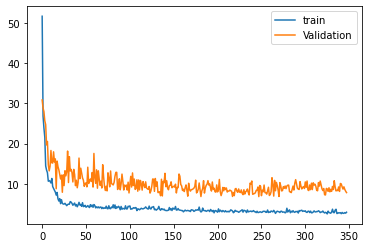

In [15]:
# evaluate the model
train_loss, train_acc = NN_model.evaluate(X_train, Y_train, verbose=0)
test_loss, test_acc = NN_model.evaluate(X_test, Y_test, verbose=0)
print('Train loss: %.3f, Test loss: %.3f' % (train_loss, test_loss))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [16]:
Y_pred = NN_model.predict(X_test)

In [17]:
error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   
print('Mean absolute percentage error on test set: ', error)

Mean absolute percentage error on test set:  [0.0886881 0.2046123 0.1250495]
